# Simple Linear Regression using statsmodel library

In [2]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
#matplotlib inline

In [3]:
#Load the data set to the data frame
mba_df = pd.read_csv("MBA Salary.csv")

In [4]:
mba_df.head()

,S. No.,Percentage in Grade 10,Salary
0,1,62.00,270000
1,2,76.33,200000
2,3,72.00,240000
3,4,60.00,250000
4,5,61.00,180000


In [5]:
mba_df.shape

(50, 3)

In [6]:
mba_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
S. No.                    50 non-null int64
Percentage in Grade 10    50 non-null float64
Salary                    50 non-null int64
dtypes: float64(1), int64(2)
memory usage: 1.2 KB


In [7]:
#import statsmodels libraries for building regression model
import statsmodels.api as sm

In [8]:
# add constatnt term 1 to the data set to estimate regression coefficient beta0
X= sm.add_constant(mba_df['Percentage in Grade 10'])

In [9]:
X.head()

,const,Percentage in Grade 10
0,1.0,62.00
1,1.0,76.33
2,1.0,72.00
3,1.0,60.00
4,1.0,61.00


In [10]:
#Split the data set into train and test set into 80:20 respectively
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, mba_df['Salary'], train_size =0.80, random_state=42)

In [11]:
train_X.shape

(40, 2)

In [12]:
#Fit the regression model
lreg = sm.OLS(train_y,train_X).fit()

In [14]:
#Print the model parameters
print(lreg.params)

const                     106610.493930
Percentage in Grade 10      2374.229302
dtype: float64


In [16]:
lreg.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
===================================================================================
Model:                    OLS                   Adj. R-squared:          0.068     
Dependent Variable:       Salary                AIC:                     1012.9356 
Date:                     2019-11-26 11:16      BIC:                     1016.3133 
No. Observations:         40                    Log-Likelihood:          -504.47   
Df Model:                 1                     F-statistic:             3.830     
Df Residuals:             38                    Prob (F-statistic):      0.0577    
R-squared:                0.092                 Scale:                   5.5486e+09
-----------------------------------------------------------------------------------
                          Coef.     Std.Err.    t    P>|t|     [0.025      0.975]  
-----------------------------------------------------------------------------------
const                  106610.4939 78693.8223 1.3548 0.1835 -52696.8208 265917.8087
Percentage in Grade 10   2374.2293  1213.1166 1.9571 0.0577    -81.5968   4830.0554
-----------------------------------------------------------------------------------
Omnibus:                    0.978              Durbin-Watson:                 2.242
Prob(Omnibus):              0.613              Jarque-Bera (JB):              0.903
Skew:                       0.147              Prob(JB):                      0.637
Kurtosis:                   2.326              Condition No.:                 434  
===================================================================================

"""

### Check for Normal distribution of residuals

<Figure size 576x432 with 0 Axes>

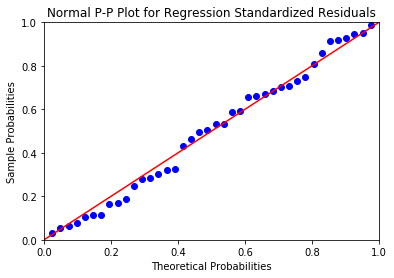

In [17]:
mba_sal_resid = lreg.resid
probplot =sm.ProbPlot(mba_sal_resid)
plt.figure(figsize=(8,6))
probplot.ppplot(line='45')
plt.title("Normal P-P Plot for Regression Standardized Residuals")
plt.show()

### Note: The cumulative distribtion of the residuals(dots) are close to the cumulative distribution of a normal disribution(line).Hence the residuals follow a approximate normal distribution.

## Test Homoscedasticity

In [19]:
def get_std_values(vals):
    return(vals-vals.mean())/vals.std()

Text(0,0.5,'Standardised Residuals')

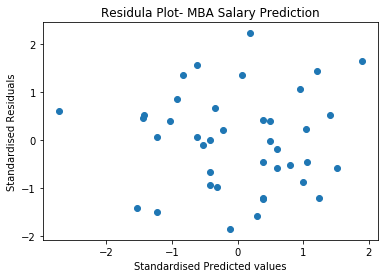

In [20]:
plt.scatter(get_std_values(lreg.fittedvalues),get_std_values(mba_sal_resid))
plt.title('Residula Plot- MBA Salary Prediction')
plt.xlabel('Standardised Predicted values')
plt.ylabel('Standardised Residuals')

## Note: It can be observed that the residuals are random and no funnel shape or pattern. Hence residuals have constant variance

## Outlier Analysis

In [21]:
# Z-score
from scipy.stats import zscore

In [24]:
mba_df['z_score_sal'] = zscore(mba_df.Salary)

In [25]:
mba_df[(mba_df.z_score_sal > 3.0) | (mba_df.z_score_sal < -3.0)]

,S. No.,Percentage in Grade 10,Salary,z-score_sal,z_score_sal


### Note:  There are no observations that are outliers as per the Z-score

## Predicting using test data set

In [26]:
pred_y = lreg.predict(test_X)

In [27]:
from sklearn.metrics import r2_score, mean_squared_error

In [28]:
np.abs(r2_score(test_y,pred_y))

0.3805122592921436

## Note: The model explains 38% of variance in y in validation data set. 

In [29]:
## Calculate the RMSE of the model- the smaller the rmse, the better the model
np.sqrt(mean_squared_error(test_y,pred_y))

58996.226166617205

## Calculating the prediction intervals

In [30]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std
# predict the low and high interval values of y
_, pred_y_low, pred_y_high = wls_prediction_std(lreg, test_X, alpha=0.1)

In [33]:
# Store all values in a data fram
pred_y_df = pd.DataFrame({'garde_10_perc' : test_X['Percentage in Grade 10'],
                         'pred_y':pred_y, 
                         'pred_y_left':pred_y_low,
                         'pred_y_right':pred_y_high})

In [34]:
pred_y_df[0:10]

,garde_10_perc,pred_y,pred_y_left,pred_y_right
13,83.00,303671.525975,170803.470474,436539.581476
39,52.00,230070.417621,100524.631306,359616.203936
30,75.00,284677.691561,155606.977049,413748.406073
45,57.58,243318.617125,115468.343265,371168.890984
17,68.40,269007.778169,141564.739754,396450.816585
48,66.00,263309.627845,136107.989645,390511.266046
26,50.00,225321.959017,94930.438461,355713.479573
25,64.60,259985.706823,132837.554929,387133.858716
32,55.00,237193.105526,108682.015676,365704.195376
19,59.00,246690.022733,119111.762196,374268.283270
